# NewsPlease Article Extraction

Using the articles harvested from All Sides, extract their information with [NewsPlease](https://github.com/fhamborg/news-please).

This notebook should be run after AllSidesMedia-HeadlineCrawler.ipynb.

In [3]:
# import modules
import pickle
import pandas as pd
from newsplease import NewsPlease
import csv

In [4]:
#define filepath
filepath = '~/Documents/Insight/news-lens/'

# load news links harvested from All Sides spider
with open(filepath+'link_file.txt') as f:
    news_links = [line.replace("\n", "") for line in f]

In [5]:
# segment list of news links into batches of n=15
from itertools import accumulate, chain, repeat, tee

# divide links into batches of n=15
def chunk(xs, n):
    assert n > 0
    L = len(xs)
    s, r = divmod(L, n)
    widths = chain(repeat(s+1, r), repeat(s, n-r))
    offsets = accumulate(chain((0,), widths))
    b, e = tee(offsets)
    next(e)
    return [xs[s] for s in map(slice, b, e)]

batch = chunk(news_links,221)

### Notice
A version of the following code was used to extract article information from NewsPlease in batches. To catch multiple different error types, parts of this were done manually.

In [ ]:
# crawler
n=0
for i in range(0,len(batch)):
    slice = batch[i]
    slice_name = str(i) + "-NewsPlease-articleCrawl.p"
    article_information = NewsPlease.from_urls(slice)
    pickle.dump(article_information, open( slice_name, "wb" ) )
    print(slice)
    print(n)
    n+=1

In [7]:
# helper function
def make_unique(url_list):
   # Not order preserving    
   unique = set(url_list)
   return list(unique)

def check_data(filepath):
    scraped = []
    not_scraped = []
    for i in range(0,221):
        file_path = filepath+"crawl/"
        open_crawl = pickle.load( open( file_path + str(i) 
                                       + "-NewsPlease-articleCrawl.p", "rb" ) )
        for url in open_crawl:
            text = open_crawl[url].text
            if text == None:
                not_scraped.append(url)
            else:
                scraped.append(url)
    scraped = make_unique(scraped)
    return scraped, not_scraped
            
success, fail = check_data(filepath)

In [8]:
# analyze data collection success
def percentage(part, whole):
    percent = 100 * float(part)/float(whole)
    format = "{0:.2f}".format(percent)
    return format+'%'

print("The extraction process yielded " 
      + str(len(success)) + " articles, or "
      + percentage(len(success),len(news_links)) 
      + " of the total.")

The extraction process yielded 3216 articles, or 97.01% of the total.


In [9]:
# harvest data from crawl

def get_data(filepath):
    news_dict = {}
    
    remove_list = ['www.', '.com', '.gov', '.org','beta.', '.eu', 
               '.co.uk', 'europe.', 'gma.', 'blogs.', 'in.', 'm.', 
               'eclipse2017.', 'money.', 'insider.', 'news.', 'finance.', 
               'www1.']
    
    for i in range(0,221):
        file_path = filepath+"crawl/"
        open_crawl = pickle.load( open( file_path + str(i) 
                                       + "-NewsPlease-articleCrawl.p", "rb" ) )
        for url in open_crawl:
            text = open_crawl[url].text
            if text != None:
                
                title = open_crawl[url].title
                
                source = open_crawl[url].source_domain
                for seq in remove_list:
                    if seq in source:
                        source=source.replace(seq,"")
                
                date = open_crawl[url].date_publish
                
                news_dict[url] = [source, title, date, text]
                
    return news_dict

all_news = get_data(filepath)

In [10]:
# gather information about the distribution of sources across the articles
def get_sources(all_news):
    news_sources = {}
    for article in all_news:
        source = all_news[article][0]
        if source not in news_sources:
            news_sources[source] = 1
        else:
            news_sources[source] += 1
    return news_sources

check_sources = get_sources(all_news)

In [11]:
# partially manually cleaned list
check_sources = {'CNN (Web News)': 205, 'USA Today': 136, 'Reuters': 99, 'The Wall Street Journal': 129, 'Vox': 85, 'Free Beacon': 5, 'Washington Times': 181, 'ABC News': 20, 'The Hill': 192, 'The New York Times': 215, 'The Washington Post': 257, 'The Washington Examiner': 93, 'Fox News': 345, 'Buzz Feed': 6, 'HuffPost': 151, 'The Los Angeles Times': 27, 'CBN': 48, 'National Review': 36, 'The Atlantic': 14, 'NPR': 76, 'The Boston Globe': 3, 'News Max': 46, 'AP': 5, 'Business insider': 11, 'reason': 23, 'time magazine': 10, 'bloomberg': 27, 'daily caller': 28, 'town hall': 105, 'politico': 92, 'daily kos': 35, 'cnet': 1, 'newsweek': 17, 'bbc': 69, 'bustle': 6, 'breitbart': 59, 'NBCNews.com': 34, 'CBS News': 25, 'daily mail': 5, 'the daily beast': 25, 'The Daily Wire': 3, 'slate': 11, 'boston herald': 1, 'axios': 3, 'yahoo': 5, 'new york daily news': 6, 'economist': 1, 'mediaite': 3, 'The Heritage Foundation': 1, 'the guardian': 55, 'new york magazine': 6, 'chicago tribune': 13, 'commentary magazine': 1, 'vice': 1, 'new yorker': 1, 'CNBC': 4, 'the blaze': 18, 'korea herald': 1, 'vanity fair': 8, 'the week': 13, 'american thinker': 1, 'PBS NewsHour': 2, 'think progress': 5, 'real clear politics': 5, 'SFGate': 2, 'mashable': 2, 'the verge': 1, 'salon': 20, 'daily press': 1, 'all sides': 5, 'mismatch': 1, 'living room conversations': 1, 'spectator': 14, 'WND.com': 1, 'redstate': 1, 'fox business': 4, 'democracy now': 5, 'Christian Science Monitor': 18, 'Pacific Standard': 1, 'scientific american': 1, 'MSNBC': 2, 'whitehouse': 1, 'forbes': 1, 'politics.blog.ajc': 1, 'the federalist': 2, 'life hacker': 1, 'hot air': 4, 'the intercept': 2, 'conservative hq': 1, 'fact check': 2, 'telegraph': 1}

In [12]:
# load media bias ratings file
bias_ratings = filepath+'allsides-media-bias-ratings.csv'

bias_dict = {}
with open(bias_ratings, mode='r') as infile:
    reader = csv.reader(infile)
    bias_dict = {rows[0]:rows[1] for rows in reader}

In [13]:
# assess string similarity
import difflib
def string_sim(a,b):
    seq = difflib.SequenceMatcher(None, a,b)
    sim = seq.ratio()*100
    return sim

In [14]:
# replace scraped names with All Media labels and bias information
def replace_names(check_sources, bias_dict):
    real_source = {}
    for entry in check_sources:
        for source in bias_dict:
            
            sim = string_sim(entry, source)
            count = check_sources[entry]
            
            if entry not in real_source:
                real_source[entry] = [source, sim, count]
            else:
                if sim > real_source[entry][1]:
                    real_source[entry] = [source, sim, count]
                    
    raw_data = {'News_Source':[],'Bias':[], 'Article_Count':[]}
    
    for key in real_source:
        new_key = real_source[key][0]
        new_count = real_source[key][2]
        
        bias = bias_dict[new_key]
        
        raw_data['News_Source'].append(new_key)
        raw_data['Article_Count'].append(new_count)
        raw_data['Bias'].append(bias)
        
    for bias_rating in raw_data['Bias']:
        if bias_rating == 'Mixed':
            bias_rating = bias_rating.replace('Mixed','Center')
    
    source_bias = pd.DataFrame(raw_data, columns = ['News_Source', 'Bias', 'Article_Count']) 

    return source_bias
          
updated_info = replace_names(check_sources, bias_dict)

# write to csv
updated_info.to_csv('news-corpus-info.csv')

In [15]:
updated_info.head()

,News_Source,Bias,Article_Count
0,CNN (Web News),Lean Left,205
1,USA TODAY,Center,136
2,Reuters,Center,99
3,Wall Street Journal- News,Center,129
4,Vox,Lean Left,85


In [18]:
# open original data file
def open_sesame(filepath):
    datafile = open(filepath+'allsides-content.csv', 'r')
    myreader = csv.reader(datafile, delimiter=' ', quotechar='|')
    return myreader

# return dict of stored values
def fill_dict():
    read_in = {'date': [], 'main_headline': [], 'description': [], 'source': [],
        'bias': [], 'headline': [], 'link': []}
    
    i=0
    for key in read_in:
        myreader2 = open_sesame()
        read_in[key] = [row[i] for row in myreader2][1:]
        i+=1
        
    # add info from NewsPlease crawl
    read_in['text'] = []
    for url in read_in['link']:
        try:
            read_in['text'].append(all_news[url][3])
        except KeyError:
            read_in['text'].append('None')
        
    return read_in

formatted = fill_dict(filepath)

In [35]:
# make into a pandas data frame
df = pd.DataFrame(formatted, columns = ['date', 'main_headline', 'description', 
                                        'source', 'bias', 'headline', 'link', 'text'])

# drop rows where there is no attached text
df = df.drop(df[df.text=='None'].index)

# drop rows when bias is 'Mixed'
df = df.drop(df[df.bias=='Mixed'].index)

# transform date information
df.date = pd.to_datetime(df.date)

# add a column for text length 
df['text_len'] = df.apply(lambda row: len(row.text), axis=1)

# drop any articles where text length < 250 words
df = df.drop(df[df.text_len < 250].index)

# drop any articles where text length > 20,000 words
df = df.drop(df[df.text_len > 20000].index)

# write to csv
df.to_csv('news-corpus-df.csv')

In [20]:
df.tail()

,date,main_headline,description,source,bias,headline,link,text,text_len
3310,2016-06-09,b'Will Obama Convince Sanders',President Obama wil meet with Bernie Sanders t...,Washington Times,Right,b'Obama meets with Sanders in push for party u...,http://www.washingtontimes.com/news/2016/jun/9...,President Obama is meeting with Sen. Bernard S...,1319
3311,2016-06-09,b'Will Obama Convince Sanders',President Obama wil meet with Bernie Sanders t...,CNN (Web News),Left,b'Sanders to Meet with Obama',http://www.cnn.com/2016/06/09/politics/bernie-...,Washington (CNN) Democrats took giant steps to...,7662
3312,2016-06-09,b'Will Obama Convince Sanders',President Obama wil meet with Bernie Sanders t...,New York Times,Left,b'Obama and Bernie Sanders to Meet for Delicat...,http://www.nytimes.com/2016/06/10/us/politics/...,WASHINGTON — Senator Bernie Sanders met with P...,1021
3313,2016-06-08,b'Hillary Clinton Wins California',Hillary makes history as the first woman to le...,Breitbart News,Right,b'Hillary Clinton Wins California Primary by W...,http://www.breitbart.com/california/2016/06/08...,SANTA MONICA — Former Secretary of State Hilla...,2192
3314,2016-06-08,b'Hillary Clinton Wins California',Hillary makes history as the first woman to le...,USA TODAY,Center,"b'Clinton makes history, declares win in Democ...",http://www.usatoday.com/story/news/politics/el...,CLOSE Hillary Clinton won California on the fi...,6838


In [21]:
bybias = df.groupby('bias')
bybias['text_len'].describe()

,count,mean,std,min,25%,50%,75%,max
bias,,,,,,,,
Center,807.0,4237.112763,2756.083106,282.0,2106.00,4189.0,5953.00,19261.0
Left,1316.0,5198.559271,3636.506162,257.0,2105.75,4525.0,7474.25,19836.0
Right,1039.0,3823.769009,2183.061876,410.0,2130.50,3446.0,5115.50,14962.0


In [22]:
df.groupby('bias').text_len.hist(alpha=0.4)

bias
Center     AxesSubplot(0.125,0.11;0.775x0.77)
Left       AxesSubplot(0.125,0.11;0.775x0.77)
Right      AxesSubplot(0.125,0.11;0.775x0.77)
Name: text_len, dtype: object

In [23]:
# add a column for month
df['month_year'] = df.date.dt.to_period('M')

count_by_date = df.groupby(['month_year','bias']).text_len
count_by_date = count_by_date.describe()

# write to csv
count_by_date.to_csv('count_by_date.csv')

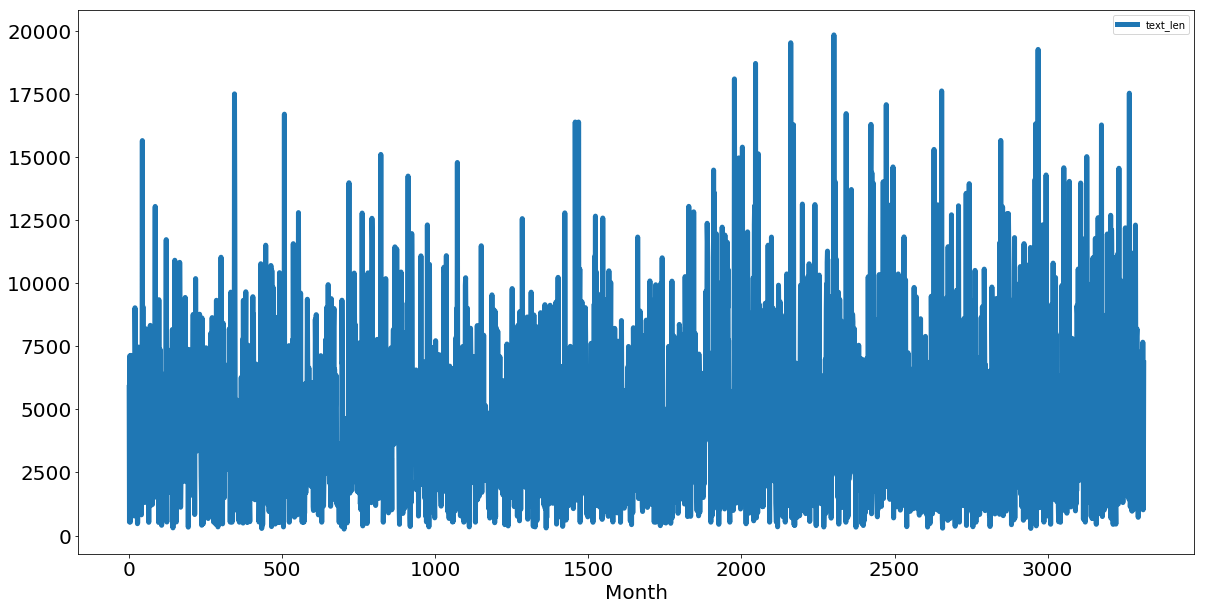

In [24]:
import matplotlib.pyplot as plt
df[['text_len']].plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Month', fontsize=20);